In [19]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize


In [20]:
df = pd.read_csv(r"C:\Users\rahmeljackson\Downloads\Iris (1).csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df = df.drop(['Id'],axis=1)
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [22]:
df["Species"] = df["Species"].map({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}).astype(int)

In [27]:
x_train = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = df['Species']

In [28]:
new_y = []
for i in y_train:
    a = [0,0,0]
    a[i] = 1
    new_y.append(a)   
    
columns = list(x_train)
X = pd.DataFrame.as_matrix(x_train,columns=columns)
Y = np.array(new_y)

In [29]:
X_train_flatten = X.reshape(X.shape[0],-1).T
Y_train_flatten = Y.reshape(Y.shape[0],-1).T
print("No of training (X):"+str(X_train_flatten.shape))
print("No of training (X):"+str(Y_train_flatten.shape))

No of training (X):(4, 150)
No of training (X):(3, 150)


In [31]:
XX_train_flatten = normalize(X_train_flatten)
YY_train_flatten = normalize(Y_train_flatten)

In [32]:
def create_placeholders(n_x,n_y):
    
    X = tf.placeholder(shape=[n_x,None],dtype=tf.float32)
    Y = tf.placeholder(shape=[n_y,None],dtype=tf.float32)
    
    return X,Y

In [33]:
def initialize_parameters():
    
    W1 = tf.get_variable("W1",[3,4],initializer = tf.zeros_initializer())#tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable("b1",[3,1],initializer = tf.zeros_initializer())

    
    parameters = {"W1":W1,
                  "b1":b1}
                  
    return parameters

In [34]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']

    Z1 = tf.add(tf.matmul(W1,X),b1)

    return Z1

In [35]:
def compute_cost(Z1,Y):
    
    logits = tf.transpose(Z1)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))
    
    return cost

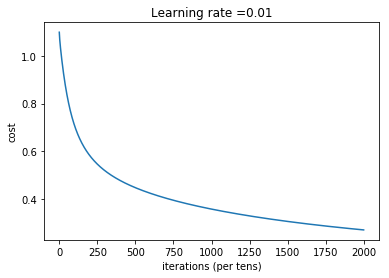

In [60]:
# Running the NN !! 
tf.reset_default_graph()
(n_x, m) = X_train_flatten.shape       # shape of X                    
n_y = Y_train_flatten.shape[0]         # shape of Y
X, Y = create_placeholders(n_x,n_y)    # creating placeholder 
tf.set_random_seed(42)
p = initialize_parameters()            # initialize parameter 
Z6 = forward_propagation(X,p)          # forward prop
y_softmax = tf.nn.softmax(Z6)          # softmax function 
cost = compute_cost(Z6,Y)              # cost function 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.01).minimize(cost)  # gradient descent, backprop, update,optimiz
sess = tf.Session()
sess.run(tf.global_variables_initializer())    #initializae 
par = sess.run(p)
Y_pred = sess.run(Z6,feed_dict={X:X_train_flatten})    #forward prop test 
cost_value = sess.run(cost,feed_dict={Z6:Y_pred,Y:Y_train_flatten})  #cost function test - First cost function 
costs =[]

for i in range(0,2000):                # 2000 epoch !! 
    _,new_cost_value = sess.run([optimizer, cost], feed_dict={X: X_train_flatten, Y: Y_train_flatten})
    costs.append(new_cost_value)

p = sess.run(p)                        # parameter saving 
y_softmax = sess.run(y_softmax,feed_dict={X: X_train_flatten, Y: Y_train_flatten})    # running softmax 

plt.plot(np.squeeze(costs))            # plot 
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(.01))
plt.show()  

In [61]:
#testing prediction !! 
correct_prediction = tf.equal(tf.argmax(y_softmax), tf.argmax(Y_train_flatten))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print("the Accuracy is :"+str(sess.run(accuracy, feed_dict={X: X_train_flatten, Y: Y_train_flatten})))

the Accuracy is :0.94
